## Legendary Pokemon Prediction


## 0. Introduction

ข้อมูลที่จะใช้ในแบบทดสอบนี้เป็นข้อมูลโปเกม่อน จาก https://serebii.net/ 

ข้อมูลจัดเก็บอยู่ในตาราง `pokemon.all` ใน Google BigQuery โดยมีรายละเอียดดังต่อไปนี้ 

<img src="https://drive.google.com/uc?id=1LAk_oH8ZEq0ePE6E6DRRAi8MI5UX93_J" width="500"/>

**ในแบบทดสอบนี้ นิสิตจะต้องวิเคราะห์ข้อมูลและสร้างโมเดลเพื่อทำนายว่าโปเกม่อนเป็นโปเกม่อนในตำนาน (Legendary Pokemon) หรือไม่?**




In [1]:
# Import standard libraries

import pandas as pd
import numpy as np
from plotnine import *
from google.cloud import bigquery

import warnings
warnings.simplefilter(action='ignore')


หลังจากรัน code block ด้านล่างนี้ จะมีลิงก์ให้กดเข้าไป Sign In Google Account ที่เคยใช้เข้า Google Big Query เมื่อ Sign In เรียบร้อย ให้นำ Verification Code กลับมากรอกในช่อง เพื่อเริ่มใช้งาน Big Query 

หมายเหตุ: หากเลือกผิด Account และต้องการ authenticate ใหม่ เลือก Runtime > Factory reset runtime แล้วรัน code block ด้านล่างอีกครั้ง

In [2]:
# Authentication for Google BigQuery

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


### Import Data
นิสิตจะเริ่มต้นวิเคราะห์ใน Python ด้วย Data Frame นี้เลยก็ได้ หรือจะเขียนคำสั่ง SQL เพิ่มเติม เพื่อวิเคราะห์ คลีนข้อมูล หรือแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสมก่อนนำเข้ามาใช้งานใน Python ก็ได้

In [3]:
# Import data
client = bigquery.Client(project='data-science-practicum-chula')
full_df = client.query('''
  SELECT *
  FROM `pokemon.all`
''').to_dataframe()

full_df.head()

,pokedex_number,name,attack,sp_attack,defense,sp_defense,speed,hp,height_m,weight_kg,type,is_legendary
0,10,Caterpie,30,20,35,20,45,45,0.3,2.9,bug,0
1,13,Weedle,35,20,30,20,50,40,0.3,3.2,bug,0
2,11,Metapod,20,25,55,25,30,50,0.7,9.9,bug,0
3,14,Kakuna,25,25,50,25,35,45,0.6,10.0,bug,0
4,266,Silcoon,35,25,55,25,15,50,0.6,10.0,bug,0


### Analyzing data with SQL and Python 

ในข้อสอบนี้นิสิตจะใช้คำสั่ง SQL หรือ Python หรือ ทั้ง 2 อย่างประกอบกันในการหาคำตอบก็ได้ 

สมมติเราต้องการหาจำนวนโปเกม่อนทั้งหมดในชุดข้อมูล 

#### SQL

สำหรับการใช้ SQL นิสิตสามารถเขียนโค้ดสั้นๆ ได้ตาม code block ด้านล่าง โดยจะต้องมีการระบุชื่อโปรเจค และ DataFrame ที่จะเก็บข้อมูลลงไป (เช่น `df` ในตัวอย่างด้านล่าง) ลงในโค้ดบรรทัดแรก จากนั้นจึงสามารถพิมพ์โค้ด SQL ได้ตามปกติ

In [4]:
%%bigquery --project data-science-practicum-chula df
SELECT 
  COUNT(*) AS total_pokemons
FROM `pokemon.all`

In [5]:
# Print the result from SQL Query
df

,total_pokemons
0,801


#### Python

In [6]:
full_df.shape[0]

801

# 1. Exploratory Data Analysis (16 points)


### Problem 1 (3 points)
เรามาเริ่มทำความเข้าใจข้อมูลเบื้องต้นก่อนที่เราจะเริ่มทำการวิเคราะห์ข้อมูลกัน

จงเขียนโค้ดเพื่อแสดง

1. สัดส่วนของโปเกม่อนในตำนาน (1 point) 

2. ค่า Min, Q1, Median, Q3, Max และ Mean ของ `height_m` และ `weight_kg` เพื่อทำความเข้าใจการกระจายตัวของขนาดโปเกม่อน (1 point) 

3. ตารางแจกแจงความถี่ของประเภทโปเกม่อน (`type`) ว่าแต่ละประเภทมีทั้งหมดกี่ตัวในชุดข้อมูล (1 point) 

In [8]:
# PROBLEM 1.1: YOUR CODE HERE
sum = full_df.shape[0]
full_df \
  .groupby(by=['is_legendary'])[['is_legendary']] \
  .count() \
  .apply(lambda x: x / sum) \
  .rename(columns={'is_legendary': 'proportion'}) 

,proportion
is_legendary,
0,0.912609
1,0.087391


In [9]:
full_df \
  .agg({'is_legendary': ['sum', 'count']}) \
  .apply(lambda x: x['sum'] / x['count'], axis=0)['is_legendary']

0.08739076154806492

In [10]:
full_df['is_legendary'].sum() / full_df['is_legendary'].count()

0.08739076154806492

In [11]:
(full_df[ full_df['is_legendary'] == 1 ].shape[0] / full_df.shape[0]) * 100

8.739076154806492

In [14]:
full_df['is_legendary'].value_counts(normalize=True)

0    0.912609
1    0.087391
Name: is_legendary, dtype: float64

In [ ]:
# PROBLEM 1.2: YOUR CODE HERE
full_df[['height_m', 'weight_kg']].describe().loc[['min', '25%', '50%', '75%', 'max', 'mean'], :]

,height_m,weight_kg
min,0.100000,0.100000
25%,0.600000,9.000000
50%,1.000000,27.300000
75%,1.500000,64.800000
max,14.500000,999.900000
mean,1.163892,61.378105


In [ ]:
# PROBLEM 1.3: YOUR CODE HERE
full_df['type'].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type, dtype: int64

In [ ]:
full_df[['type', 'is_legendary']].value_counts()

type      is_legendary
water     0               108
normal    0               102
grass     0                74
bug       0                69
fire      0                47
rock      0                41
psychic   0                36
electric  0                34
poison    0                32
ground    0                30
fighting  0                28
ghost     0                26
dark      0                26
ice       0                21
dragon    0                20
steel     0                18
fairy     0                17
psychic   1                17
dragon    1                 7
water     1                 6
steel     1                 6
fire      1                 5
electric  1                 5
grass     1                 4
rock      1                 4
normal    1                 3
dark      1                 3
bug       1                 3
flying    0                 2
ground    1                 2
ice       1                 2
flying    1                 1
fairy     1      

### Problem 2 (5 points)

จากโจทย์ข้อก่อนหน้านี้ เราได้เห็นแล้วว่าโปเกม่อนมีความสูงได้มากถึง 14.5 เมตรและหนักได้มากถึงเกือบ 1,000 กิโลกรัม

จงเขียนโค้ดเพื่อ

1. แสดง Scatter Plot แสดงความสัมพันธ์ระหว่างส่วนสูง (`height_m`) และ น้ำหนัก (`weight_kg`) ของโปเกม่อน และใช้สีเพื่อระบุว่าเป็นโปเกม่อนธรรมดาหรือโปเกม่อนในตำนาน (`is_legendary`) ​(2 points)

2. คำนวณค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานของนำ้หนักและส่วนสูง โปเกม่อนธรรมดาเปรียบเทียบกับโปเกม่อนในตำนาน (2 points)

3. จากการวิเคราะห์ข้างต้น นิสิตคิดว่าน้ำหนักและส่วนสูงจะเป็นตัวแปรที่ดีในการทำนายโปเกม่อนในตำนานหรือไม่ เพราะอะไร (1 point)

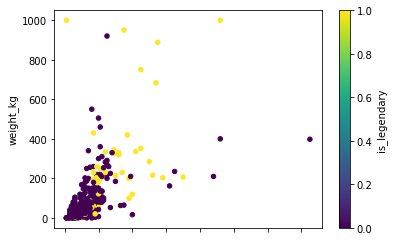

In [ ]:
# PROBLEM 2.1: YOUR CODE HERE
full_df.plot.scatter(x='height_m',y='weight_kg',c='is_legendary', cmap='viridis')

[]

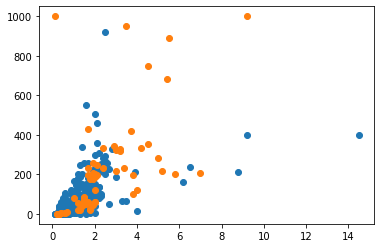

In [ ]:
import matplotlib.pyplot as plt


s1 = full_df[full_df['is_legendary'] != 1]
s2 = full_df[full_df['is_legendary'] == 1]

plt.scatter(x=s1['height_m'], y=s1['weight_kg'])
plt.scatter(x=s2['height_m'], y=s2['weight_kg'])
plt.plot()

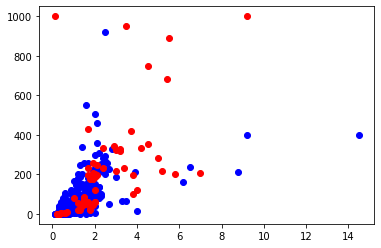

In [ ]:
color = {1: 'red',0: 'blue'}
groups = full_df.groupby(by=['is_legendary'])
for key, group in groups:
  plt.scatter(x=group['height_m'], y=group['weight_kg'], label=key, c=color[key],)

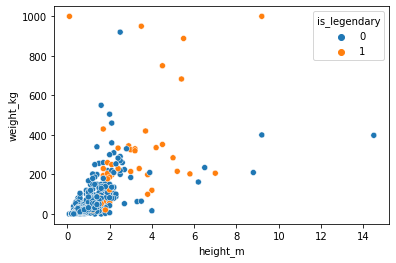

In [22]:
import seaborn as sns
sns.scatterplot(data=full_df, x='height_m', y='weight_kg', hue='is_legendary')
# sns.relplot(data=full_df, x='height_m', y='weight_kg', hue='is_legendary')

In [ ]:
# PROBLEM 2.2: YOUR CODE HERE
full_df.groupby(by=['is_legendary']).agg({
  'height_m' : ['mean', 'std', 'count'], 
  'weight_kg' : ['mean', 'std', 'count']
})

height_m                  weight_kg                  
                  mean      std count        mean         std count
is_legendary                                                       
0             1.055618  0.92025   712   48.007163   73.285822   712
1             2.281159  1.77294    69  199.350725  244.592937    69

In [ ]:
# PROBLEM 2.3:

# (YOUR ANSWER HERE)

ไม่ได้ เนื่องจากความสูงและน้ำหนักของโปเกม่อนทั้งสองชนิดคาบเกี่ยวกัน สังเกตจาก SD ผลลัพธ์ของความสูงและน้ำหนักมีค่าต่างกันไม่เกิน 1 SD


### Problem 3 (5 points)
ในขั้นตอนถัดไป เราจะมาลองดูว่าประเภทของโปเกม่อน (`type`) มีความสัมพันธ์กับการเป็นโปเกม่อนในตำนาน (`is_legendary`) หรือไม่

จงเขียนโค้ดเพื่อ

1. แสดงสัดส่วนของโปเกม่อนในตำนาน (`is_legendary`) ของโปเกม่อนแต่ละประเภท (`type`) ในรูปแบบตาราง โดยเรียงจากประเภทที่มีสัดส่วนโปเกม่อนในตำนานจากมากไปน้อย (2 points)

2. แสดงผลข้อมูลในข้อแรก ด้วยกราฟที่เหมาะสมในการเปรียบเทียบสัดส่วนโปเกม่อนในตำนานของโปเกม่อนแต่ละประเภท (2 points)

3. จากการวิเคราะห์ข้างต้น นิสิตคิดว่าประเภทของโปเกม่อน (`type`) จะเป็นตัวแปรที่ดีในการทำนายโปเกม่อนในตำนานหรือไม่ เพราะอะไร (1 point)

In [ ]:
# PROBLEM 3.1: YOUR CODE HERE
%%bigquery --project data-science-practicum-chula df
SELECT 
  type, 
  SUM(is_legendary) / COUNT(is_legendary) AS type_ratio
FROM `pokemon.all`
GROUP BY type
ORDER BY SUM(is_legendary)/COUNT(is_legendary) DESC


In [ ]:
 df_type_count = full_df \
  .groupby(by=['type']) \
  .agg({'is_legendary': ['sum', 'count']}) \
  .apply(lambda x: x['is_legendary']['sum'] / x['is_legendary']['count'], axis=1) \
  .sort_values(ascending=True) 

df_type_count

type
poison      0.000000
fighting    0.000000
normal      0.028571
ghost       0.037037
bug         0.041667
grass       0.051282
water       0.052632
fairy       0.055556
ground      0.062500
ice         0.086957
rock        0.088889
fire        0.096154
dark        0.103448
electric    0.128205
steel       0.250000
dragon      0.259259
psychic     0.320755
flying      0.333333
dtype: float64

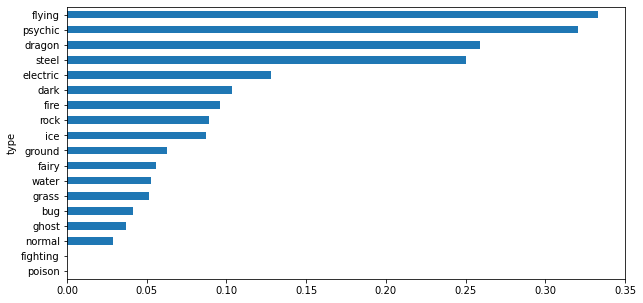

In [ ]:
# PROBLEM 3.2: YOUR CODE HERE
df_type_count.plot(kind='barh', figsize=[10,5])

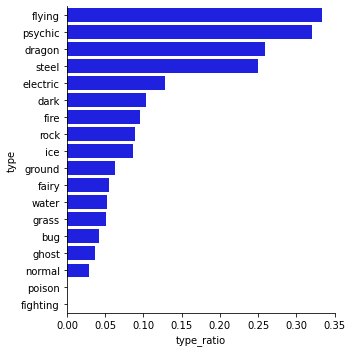

In [ ]:
sns.catplot(data=df, y='type', x='type_ratio', kind='bar', color='blue')

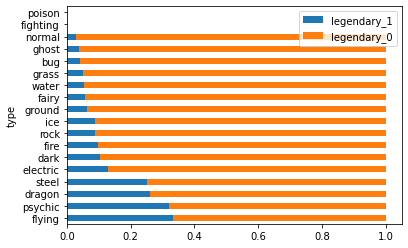

In [20]:
df_pivot_1 = full_df.pivot_table(index=['type'], columns=['is_legendary'], values=['attack'], aggfunc='count')
df_pivot_2 = pd.DataFrame({
    'legendary_1': df_pivot_1['attack'][1] / (df_pivot_1['attack'][0] + df_pivot_1['attack'][1]),
    'legendary_0': df_pivot_1['attack'][0] / (df_pivot_1['attack'][0] + df_pivot_1['attack'][1]),
}, index=df_pivot_1.index).sort_values(by=['legendary_0'], ascending=True)

df_pivot_2.plot(kind='barh', stacked=True)

In [ ]:
# PROBLEM 3.3

(YOUR ANSWER HERE)

จากกราฟ 3.2 type ก็น่าจะเป็นตัวแปรที่ดี เพราะพอบอกได้ว่าโปเกม่อนในตำนานควรมีแนวโน้มเป็น type อะไร  และไม่ควรเป็น type อะไร

### Problem 4 (3 points++)
สุดท้ายนี้ เราจะมาลองดูว่าค่าสถิติในการต่อสู้ของโปเกม่อน (`attack`, `sp_attack`, `defense`, `sp_defense`, `hp`, `speed`) มีความสัมพันธ์กับการเป็นโปเกม่อนในตำนานหรือไม่ 

1. จงเขียนโค้ดเพื่อสร้าง Boxplots เปรียบเทียบสถิติการต่อสู้ทั้ง 6 ค่า (`attack`, `sp_attack`, `defense`, `sp_defense`, `hp`, `speed`) ของโปเกม่อนธรรมดาและโปเกม่อนในตำนาน (2 points) 

- 🔥 **Bonus**: ทำให้ Boxplots ทั้งหมดแสดงผลอยู่ในภาพเดียวกันแบบ Small Multiples ([Something like this](https://i.stack.imgur.com/WL4bd.png)) (2 point)

2. จากข้อมูลข้างต้น นิสิตคิดว่าสถิติการต่อสู้ทั้ง 6 ตัวเป็นตัวแปรที่ดีในการทำนายโปเกม่อนในตำนานหรือไม่ เพราะอะไร (1 point)



In [24]:
# Hint: อาจจะเป็นประโยชน์สำหรับข้อ Bonus

melted_df = full_df.melt(
    id_vars=['name','is_legendary'], 
    value_vars=['attack', 'sp_attack',
                'defense','sp_defense',
                'hp','speed'])

melted_df.head()

,name,is_legendary,variable,value
0,Caterpie,0,attack,30
1,Weedle,0,attack,35
2,Metapod,0,attack,20
3,Kakuna,0,attack,25
4,Silcoon,0,attack,35


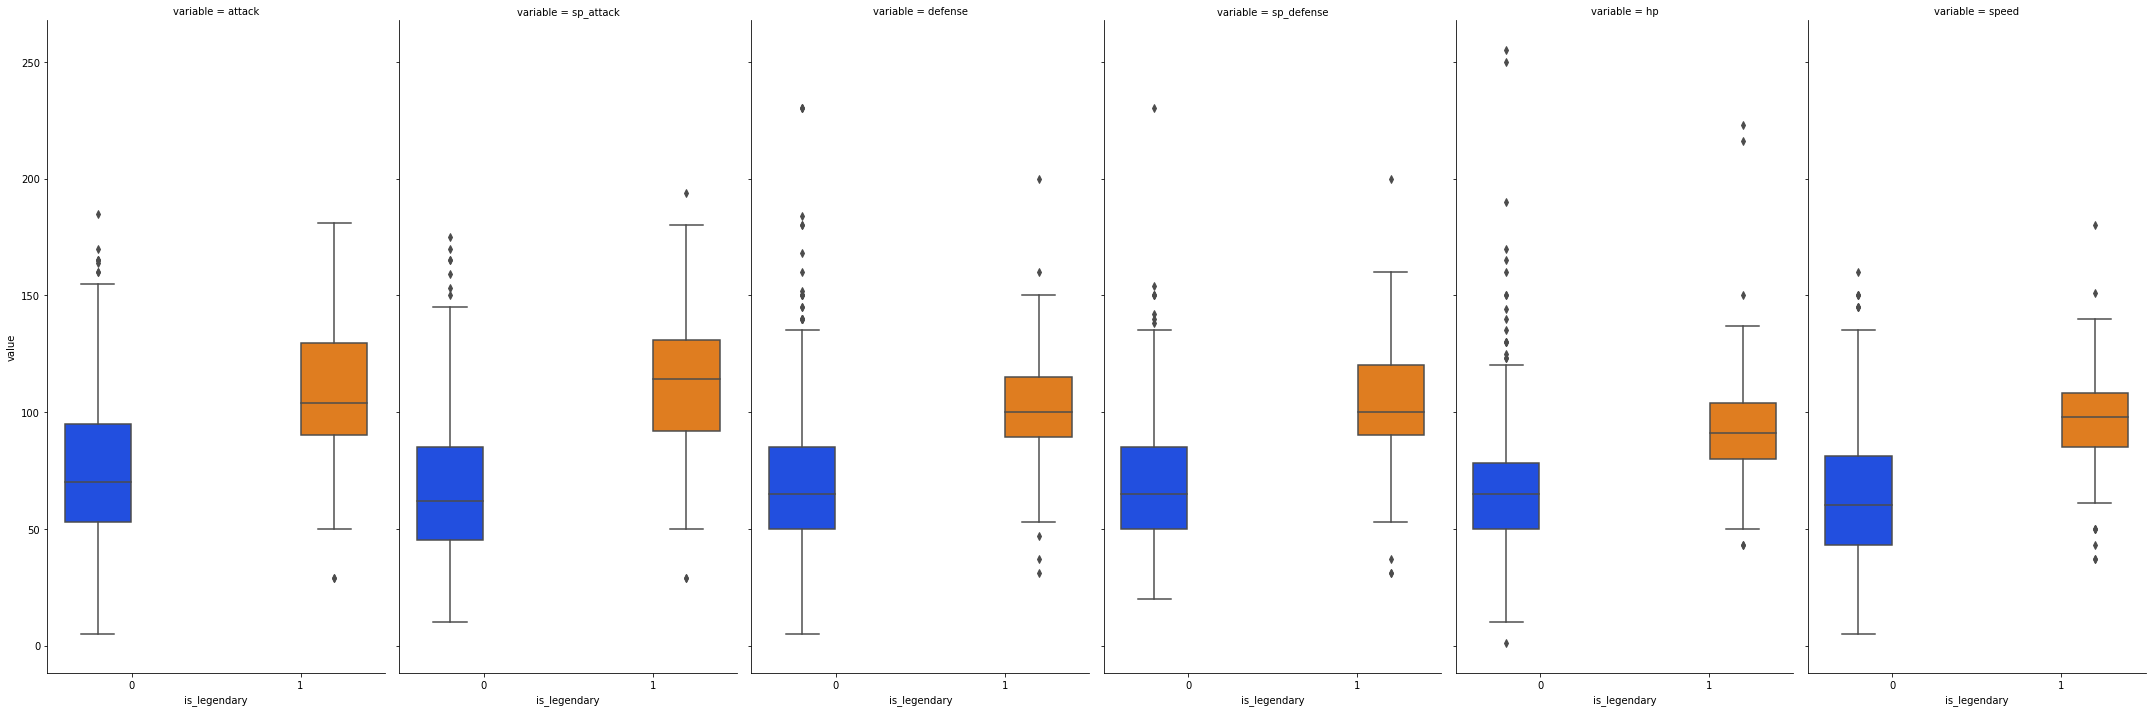

In [25]:
# PROBLEM 4.1: YOUR CODE HERE
g = sns.FacetGrid(melted_df, col='variable', sharey=True, height=10, aspect=0.5)
g.map_dataframe(sns.boxplot, x='is_legendary', y='value', hue='is_legendary', palette='bright')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02583ba250>,
      dtype=object)

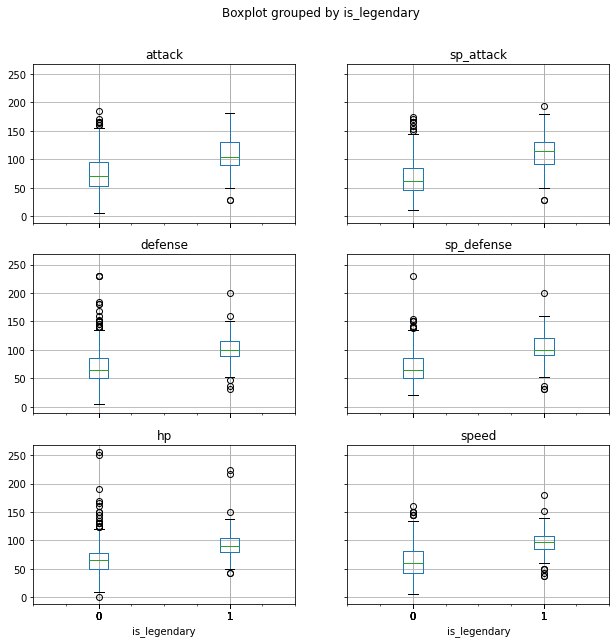

In [ ]:
full_df.boxplot(
    by='is_legendary', 
    column=['attack', 'sp_attack','defense','sp_defense','hp','speed'],
    figsize = (10, 10)
)

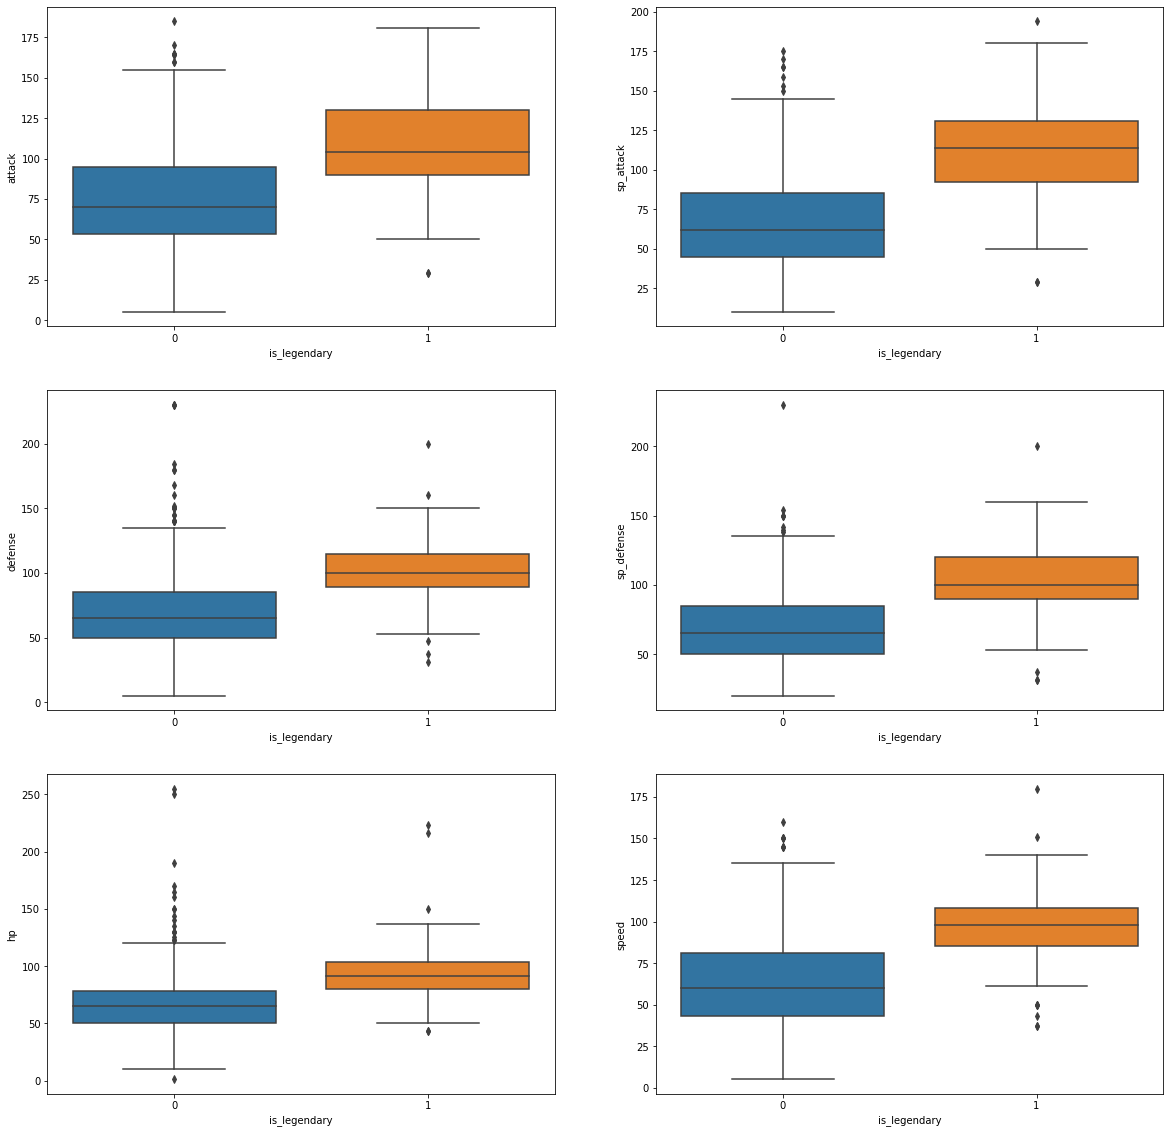

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[20,20])

for i, value in enumerate(['attack', 'sp_attack','defense','sp_defense','hp','speed']):
  # full_df.boxplot(ax=ax[int(i / 2), int(i % 2)], column=value, by='is_legendary')
  sns.boxplot(ax=ax[int(i / 2), int(i % 2)], data=full_df, x='is_legendary', y=value)

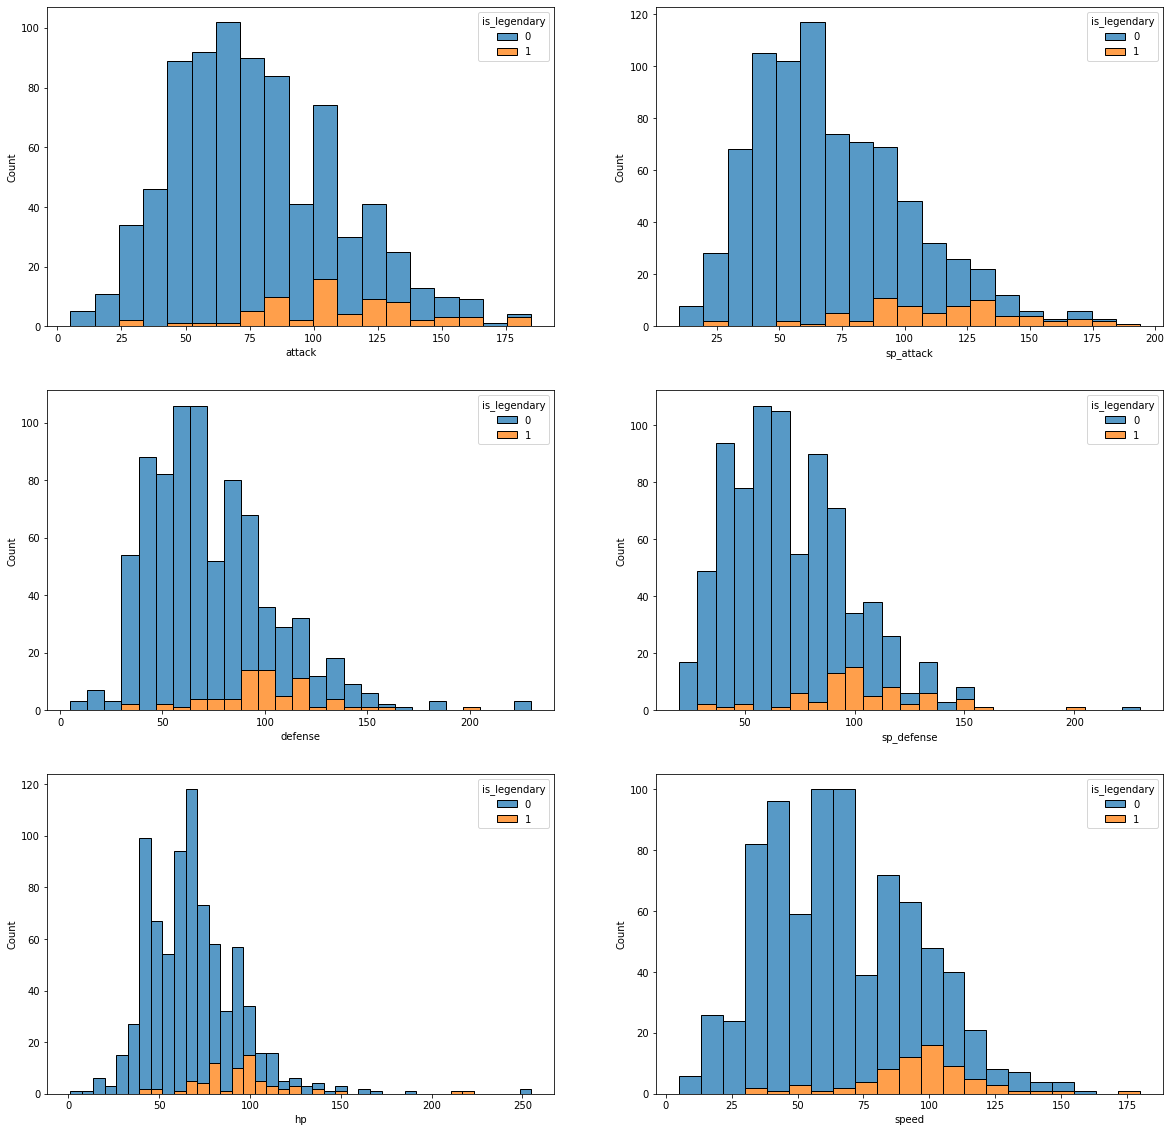

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[20,20])

for i, value in enumerate(['attack', 'sp_attack','defense','sp_defense','hp','speed']):
  # full_df.hist(ax=ax[int(i / 2), int(i % 2)], column=value)
  sns.histplot(ax=ax[int(i / 2), int(i % 2)], data=full_df, x=value, hue='is_legendary', multiple='stack')
  # sns.histplot(ax=ax[int(i / 2), int(i % 2)], data=full_df, x=value)

In [ ]:
for key in ['attack', 'sp_attack','defense','sp_defense','hp','speed']:
  print(full_df.groupby(by='is_legendary')[key].describe())

              count        mean        std   min   25%    50%     75%    max
is_legendary                                                                
0             731.0   74.841313  30.576820   5.0  53.0   70.0   95.00  185.0
1              70.0  109.357143  31.562698  29.0  90.0  104.0  129.75  181.0
              count        mean        std   min   25%    50%    75%    max
is_legendary                                                               
0             731.0   67.240766  29.084657  10.0  45.0   62.0   85.0  175.0
1              70.0  113.757143  34.403587  29.0  92.0  114.0  131.0  194.0
              count       mean        std   min    25%    50%    75%    max
is_legendary                                                               
0             731.0  70.481532  29.929838   5.0  50.00   65.0   85.0  230.0
1              70.0  99.400000  26.929538  31.0  89.25  100.0  115.0  200.0
              count        mean        std   min   25%    50%    75%    max
is_legen

In [ ]:
full_df[full_df.is_legendary == 0][['attack', 'sp_attack','defense','sp_defense','hp','speed']].describe()

,attack,sp_attack,defense,sp_defense,hp,speed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,74.841313,67.240766,70.481532,67.945280,66.424077,63.548564
std,30.576820,29.084657,29.929838,25.958128,24.804290,27.736456
min,5.000000,10.000000,5.000000,20.000000,1.000000,5.000000
25%,53.000000,45.000000,50.000000,50.000000,50.000000,43.000000
50%,70.000000,62.000000,65.000000,65.000000,65.000000,60.000000
75%,95.000000,85.000000,85.000000,85.000000,78.000000,81.000000
max,185.000000,175.000000,230.000000,230.000000,255.000000,160.000000


In [ ]:
full_df[full_df.is_legendary == 1][['attack', 'sp_attack','defense','sp_defense','hp','speed']].describe()

,attack,sp_attack,defense,sp_defense,hp,speed
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,109.357143,113.757143,99.400000,101.885714,95.428571,95.428571
std,31.562698,34.403587,26.929538,29.277554,30.012351,24.671506
min,29.000000,29.000000,31.000000,31.000000,43.000000,37.000000
25%,90.000000,92.000000,89.250000,90.000000,80.000000,85.000000
50%,104.000000,114.000000,100.000000,100.000000,91.000000,98.000000
75%,129.750000,131.000000,115.000000,120.000000,103.750000,108.000000
max,181.000000,194.000000,200.000000,200.000000,223.000000,180.000000


In [ ]:
# PROBLEM 4.2

(YOUR ANSWER HERE)

<Figure size 1440x360 with 0 Axes>

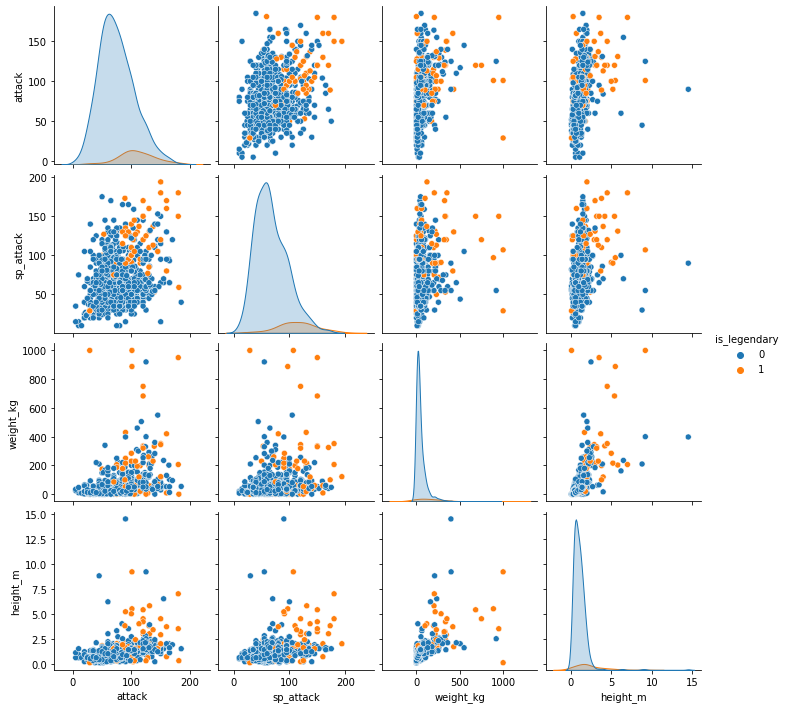

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

# sns.histplot(data=full_df, x='attack')
# sns.distplot(full_df['attack'], bins=20)
# sns.jointplot(data=full_df, x='height_m', y='weight_kg')
sns.pairplot(full_df[['attack', 'sp_attack', 'weight_kg', 'height_m', 'is_legendary']], hue='is_legendary')
# sns.catplot(data=melted_df, kind='box', x='is_legendary', y='value', row='variable', sharey=True)
# sns.stripplot(data=full_df, x='type', y='attack', hue='is_legendary', jitter=True, dodge=True)

# 2. Model Training (16 points)


### Problem 5 (4 points)
ก่อนที่เราจะเริ่มสร้างโมเดล เราจะมาสร้าง Naive Prediction เพื่อนำไปใช้เป็น baseline ในการประเมินโมเดลของเราต่อไป

1. จงเสนอชุดเงื่อนไข(ง่ายๆ) ที่สามารถใช้เป็นกฎในการคาดเดาว่าโปเกม่อนตัวไหนจะเป็นโปเกม่อนในตำนาน โดยอ้างอิงจากผลการวิเคราะห์ข้อมูลในหัวข้อก่อนหน้า (2 points) 

2. สร้างคอลัมน์​ `naive_prediction` เพื่อเก็บผลลัพธ์จากการประมวลผลตามเงื่อนไขที่เสนอในข้อแรก (2 points)


In [72]:
# PROBLEM 5.1
def calculate_naive_prediction(df):
  
  if df.type in ['poison', 'fighting']:
    return 0
  
  elif df.weight_kg > 600:
    return 1

  elif df.attack < 50 or df.sp_attack < 50:
    return 0
  
  else:
    return 0

(YOUR ANSWER HERE) 
*  rule 1
*  rule 2
*  ...

In [73]:
# PROBLEM 5.2: YOUR CODE HERE
full_df['naive_prediction'] = full_df.apply(calculate_naive_prediction, axis=1)
print(full_df[['naive_prediction', 'is_legendary']].value_counts())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(full_df['is_legendary'], full_df['naive_prediction'])
# ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot()

naive_prediction  is_legendary
0                 0               730
                  1                64
1                 1                 6
                  0                 1
dtype: int64


### Problem 6 (2 points)

1. แบ่งข้อมูลเป็น train / test ในสัดส่วน (60:40) โดยกำหนด random seed เป็น 1234 (1 คะแนน)

2. แบ่งข้อมูลเพิ่มเติม เป็น train / validation ในสัดส่วน (50:50) โดยกำหนด random seed เป็น 1234 (1 คะแนน)


In [81]:
random_seed = 1234

In [82]:
# PROBLEM 6.1: YOUR CODE HERE
full_df.isnull().sum()

pokedex_number       0
name                 0
attack               0
sp_attack            0
defense              0
sp_defense           0
speed                0
hp                   0
height_m            20
weight_kg           20
type                 0
is_legendary         0
naive_prediction     0
dtype: int64

In [83]:
#Drop unnecessary column and rmove nan value row
full_df2 = full_df.drop(['pokedex_number','name','naive_prediction'],axis=1)
# full_df3 = full_df2.dropna()
full_df3 = full_df2.fillna(full_df2.mean())
full_df3.isnull().sum()

attack          0
sp_attack       0
defense         0
sp_defense      0
speed           0
hp              0
height_m        0
weight_kg       0
type            0
is_legendary    0
dtype: int64

In [84]:
# Change Type to dummy
full_df4 = pd.get_dummies(full_df3, columns=['type'], drop_first=True)
full_df4.head()

,attack,sp_attack,defense,sp_defense,speed,hp,height_m,weight_kg,is_legendary,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water
0,30,20,35,20,45,45,0.3,2.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,35,20,30,20,50,40,0.3,3.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20,25,55,25,30,50,0.7,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25,25,50,25,35,45,0.6,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,25,55,25,15,50,0.6,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# PROBLEM 6.1: YOUR CODE HERE
X = full_df4.drop(columns=['is_legendary'])
y = full_df4['is_legendary']

#Checking if there is any imbalances in the dataset
full_df2['is_legendary'].value_counts(normalize=True)

0    0.912609
1    0.087391
Name: is_legendary, dtype: float64

480 480 321 321
0    0.9125
1    0.0875
Name: is_legendary, dtype: float64
0    0.912773
1    0.087227
Name: is_legendary, dtype: float64


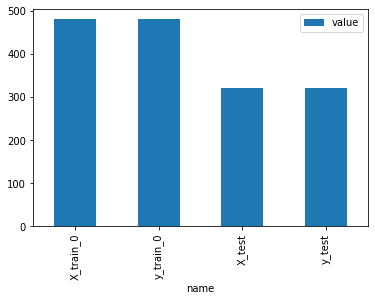

In [86]:
from sklearn.model_selection import train_test_split
X_train_0, X_test, y_train_0, y_test = train_test_split(X, y, train_size=0.6, random_state=1234, stratify=y)

print(X_train_0.shape[0], y_train_0.shape[0], X_test.shape[0], y_test.shape[0])
print(y_train_0.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

pd.DataFrame(
    data=[
      ['X_train_0', X_train_0.shape[0]],
      ['y_train_0', y_train_0.shape[0]],
      ['X_test', X_test.shape[0]],
      ['y_test', y_test.shape[0]],
    ], 
    columns=['name', 'value']
).plot(kind='bar', x='name', y='value')

Distrbution after resample:
Size: from  480  to  876


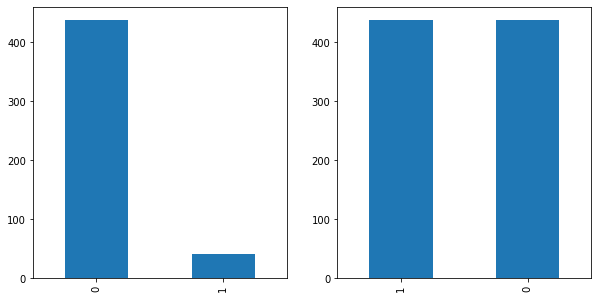

In [87]:
# Dataset is imbalanced. Lets use SMOTE technique to resolve this issue
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=random_seed)

X_train_1_tmp, y_train_1 = os.fit_resample(X_train_0, y_train_0)
X_train_1 = pd.DataFrame(data=X_train_1_tmp, columns=X_train_0.columns)

# we can Check the numbers of our data
print("Distrbution after resample:")
print("Size: from ", y_train_0.shape[0], ' to ', y_train_1.shape[0])
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
y_train_0.value_counts().plot(ax=ax[0], kind='bar')
y_train_1.value_counts().plot(ax=ax[1], kind='bar')

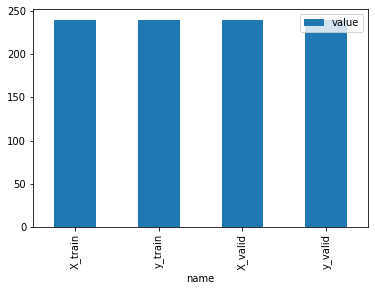

In [88]:
# PROBLEM 6.2: YOUR CODE HERE
X_train, X_valid, y_train, y_valid = train_test_split(X_train_0, y_train_0, train_size=0.5, random_state=random_seed, stratify=y_train_0)

pd.DataFrame(
    data=[
      ['X_train', X_train.shape[0]],
      ['y_train', y_train.shape[0]],
      ['X_valid', X_valid.shape[0]],
      ['y_valid', y_valid.shape[0]],
    ], 
    columns=['name', 'value']
).plot(kind='bar', x='name', y='value')


In [89]:
# PROBLEM 6.2: YOUR CODE HERE

### Problem 7 (5 points)

1. จงเขียนโค้ดเพื่อสร้างโมเดล Logistic Regression สำหรับทำนายโปเกม่อนในตำนาน (3 points)

2. แสดงค่า coefficient ของ feature ใดก็ได้ แล้วอธิบายความหมายของค่า coefficient นั้น (2 points)

In [91]:
# PROBLEM 7.1: YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
param_grid = {
    'C': np.logspace(-5, 8, 15), 
    'penalty': [None, 'l1', 'l2']
}

grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_logreg.fit(X_train, y_train)

print("Best Parameters: ", grid_logreg.best_params_)
print("Training Set Score: ", grid_logreg.best_score_)
print("Validation Set Score", grid_logreg.score(X_valid, y_valid))

Best Parameters:  {'C': 8.483428982440725e-05, 'penalty': 'l2'}
Training Set Score:  0.9291666666666668
Validation Set Score 0.9416666666666667


In [96]:
# PROBLEM 7.2: YOUR CODE HERE
df_logreg_result = pd.DataFrame({
    'feature': X_train.columns,
    'coef': grid_logreg.best_estimator_.coef_[0]
}).sort_values(by=['coef'], ascending=False)
df_logreg_result

,feature,coef
3,sp_defense,0.019187
4,speed,0.017684
1,sp_attack,0.014928
2,defense,0.010011
5,hp,0.007966
7,weight_kg,0.003993
0,attack,0.003954
21,type_psychic,0.000248
6,height_m,0.000236
23,type_steel,0.000089


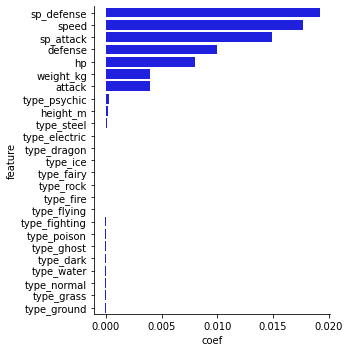

In [97]:
sns.catplot(data=df_logreg_result, kind='bar', y='feature', x='coef', color='blue')

(YOUR ANSWER HERE)

### Problem 8 (5 points)

1. จงเขียนโค้ดเพื่อสร้างโมเดล Decision Tree หรือ Random Forest สำหรับทำนายโปเกม่อนในตำนานขึ้นอีกหนึ่งโมเดล (3 points)

2. แสดงค่า Feature Importance และอภิปรายผลที่ได้ (2 points)

In [99]:
# PROBLEM 8.1: YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state=1)
param_gird = {
  'max_depth': [4, 6, 8],
  'min_samples_leaf': [1, 2, 4],
  'criterion': ['gini', 'entropy'],
}

grid_dt = GridSearchCV(estimator=dt, param_grid=param_gird, cv=5)
grid_dt.fit(X_train, y_train)

print("Best Parameters: ", grid_dt.best_params_)
print("Training Set Score: ", grid_dt.best_score_)
print("Validation Set Score", grid_dt.score(X_valid, y_valid))

Best Parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
Training Set Score:  0.925
Validation Set Score 0.9


In [100]:
# PROBLEM 8.2: YOUR CODE HERE

[Text(590.1923076923077, 978.48, 'sp_defense <= 97.0\nentropy = 0.428\nsamples = 240\nvalue = [219, 21]\nclass = General'),
 Text(214.6153846153846, 761.0400000000001, 'speed <= 98.5\nentropy = 0.145\nsamples = 193\nvalue = [189, 4]\nclass = General'),
 Text(107.3076923076923, 543.6, 'entropy = 0.0\nsamples = 165\nvalue = [165, 0]\nclass = General'),
 Text(321.9230769230769, 543.6, 'height_m <= 1.45\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]\nclass = General'),
 Text(214.6153846153846, 326.1600000000001, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = General'),
 Text(429.2307692307692, 326.1600000000001, 'speed <= 141.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]\nclass = General'),
 Text(321.9230769230769, 108.72000000000003, 'entropy = 0.764\nsamples = 9\nvalue = [7, 2]\nclass = General'),
 Text(536.5384615384615, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Legend'),
 Text(965.7692307692307, 761.0400000000001, 'weight_kg <= 162.75\nentropy

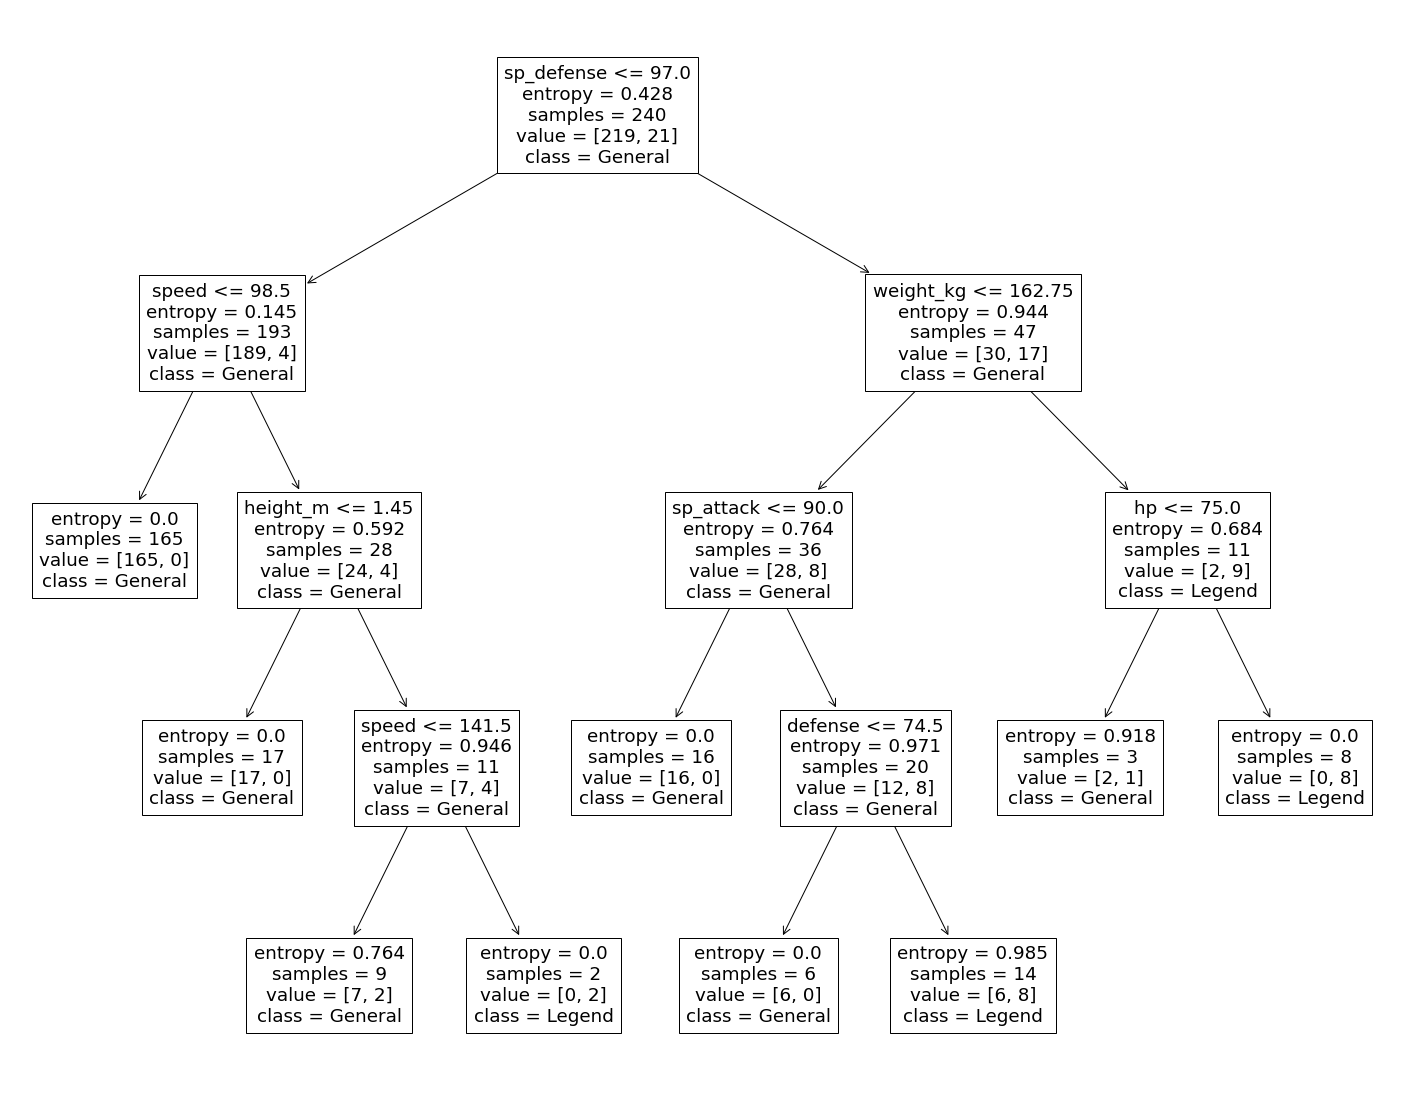

In [101]:
# print(tree.export_text(grid_dt.best_estimator_))
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(grid_dt.best_estimator_, feature_names=X_train.columns, class_names=['General', 'Legend'])


In [102]:
! pip install dtreeviz

     |████████████████████████████████| 62 kB 673 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=f9b47b3140f205216d5c0625460307e485296be47f7ffe22b1207f28a039695e
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


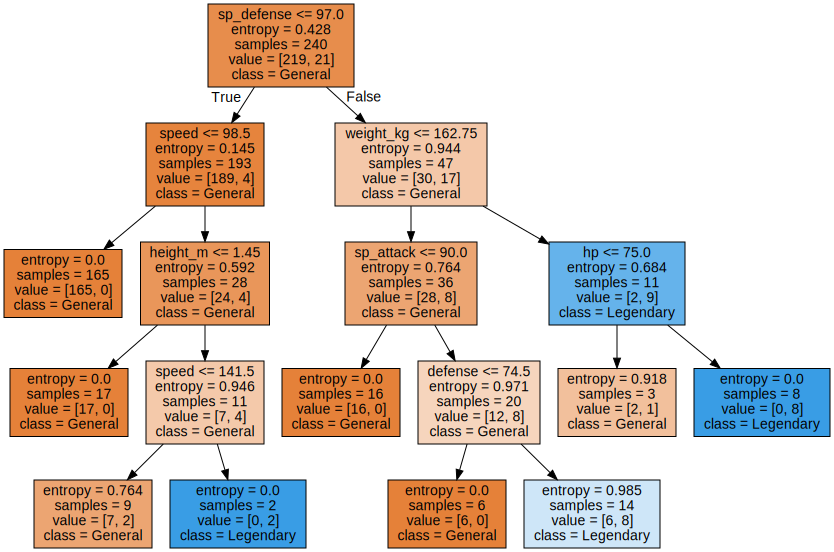

In [103]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(grid_dt.best_estimator_, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['General', 'Legendary'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

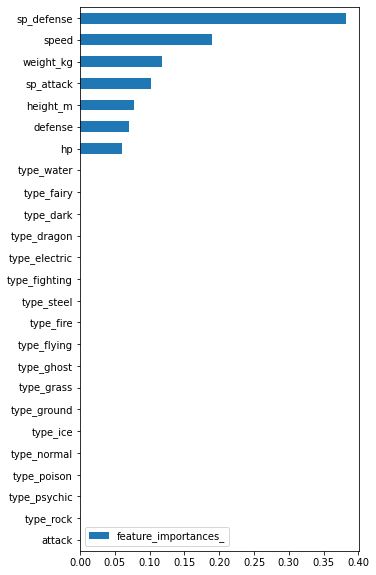

In [106]:
pd.DataFrame(
    {'feature_importances_': grid_dt.best_estimator_.feature_importances_}, 
    index=X_train.columns
).sort_values(by='feature_importances_', ascending=True).plot(kind='barh', figsize=(5,10))

(YOUR ANSWER HERE)

In [119]:
# PROBLEM 8.1: YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rf = RandomForestClassifier(random_state=1)
param_gird = {
  'n_estimators': [10, 20, 50],
  'max_depth': [4,6,8],
  'min_samples_leaf': [1, 2, 5],
  'max_features': ['log2', 'sqrt'],
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_gird, cv=5)
grid_rf.fit(X_train, y_train)

print("Best Parameters: ", grid_rf.best_params_)
print("Training Set Score: ", grid_rf.best_score_)
print("Validation Set Score:", grid_rf.score(X_valid, y_valid))

Best Parameters:  {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 50}
Training Set Score:  0.9458333333333334
Validation Set Score: 0.9416666666666667


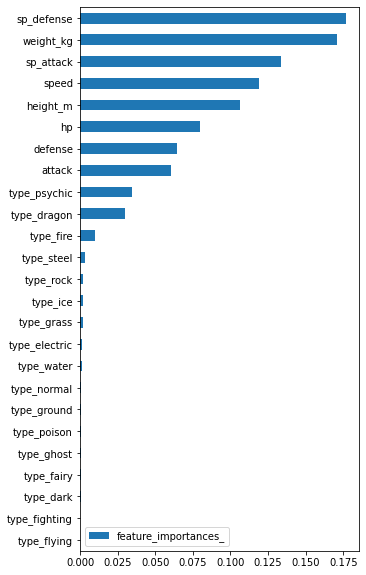

In [120]:
pd.DataFrame(
    {'feature_importances_': grid_rf.best_estimator_.feature_importances_}, 
    index=X_train.columns
).sort_values(by='feature_importances_', ascending=True).plot(kind='barh', figsize=(5,10))

# 3. Model Evaluation (14 points)


## Problem 9 (5 points)
1. ประเมิน performance ของโมเดลจาก 2 ข้อก่อนหน้านี้ ด้วยวิธีการและ metrics ที่เหมาะสม (4 points)

2. อธิบายผลที่ได้ และเลือกโมเดลที่จะนำไปใช้งานต่อ (1 point)

In [107]:
# PROBLEM 9.1: YOUR CODE HERE
y_pred_logreg = grid_logreg.predict(X_valid)
y_pred_dt = grid_dt.predict(X_valid)

from sklearn.metrics import classification_report

print('Logistic Regression Report:')
print(classification_report(y_valid, y_pred_logreg))

print('Decision Tree Report:')
print(classification_report(y_valid, y_pred_dt))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       219
           1       1.00      0.33      0.50        21

    accuracy                           0.94       240
   macro avg       0.97      0.67      0.73       240
weighted avg       0.95      0.94      0.93       240

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       219
           1       0.41      0.33      0.37        21

    accuracy                           0.90       240
   macro avg       0.67      0.64      0.66       240
weighted avg       0.89      0.90      0.90       240



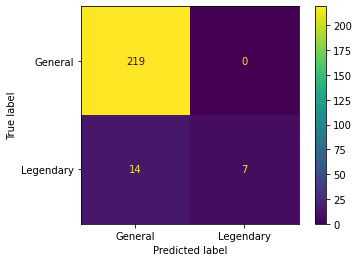

In [112]:
cm = confusion_matrix(y_valid, y_pred_logreg)
ConfusionMatrixDisplay(cm, display_labels=['General', 'Legendary']).plot()

# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(grid_logreg.best_estimator_, X_test, y_test)

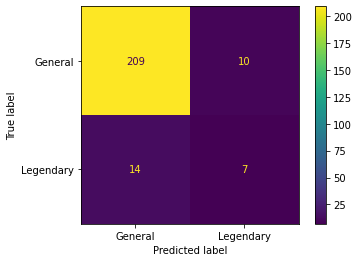

In [113]:
cm = confusion_matrix(y_valid, y_pred_dt)
ConfusionMatrixDisplay(cm, display_labels=['General', 'Legendary']).plot()

In [ ]:
# PROBLEM 9.2

(YOUR ANSWER HERE) 

## Problem 10 (4 points)

1. คำนวณค่า test error ของโมเดลที่เลือก (1 point)
2. คำนวณค่า test error ของ Naive prediction ที่เตรียมไว้ก่อนหน้านี้ (2 point) 
3. อภิปรายผลทีได้ (1 point)

In [ ]:
# PROBLEM 10.1: YOUR CODE HERE

In [ ]:
# PROBLEM 10.2: YOUR CODE HERE

In [ ]:
# PROBLEM 10.3

(YOUR ANSWER HERE)